In [1]:
#Creators -
#Shreejit Gajanan Deshmukh
#Venkata Sai Advaith Kandiraju
#PRCV Spring 2023' Assignment 5 - Deep learning

In [2]:
#Summary -
#This program tests our trained network on new hand-drawn digits of our own.

In [3]:
#importing libraries
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import numpy as np
import cv2
from torchvision import transforms

In [9]:
#Hyperparameters
learning_rate = 0.01
momentum = 0.5

#Batch size for testing
batch_size_test = 1000

In [5]:
#Building the network with 2 convolution layers and following Relu, pooling and dropout layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [6]:
#Initializing our neural network with the class defined above and the optimizer using stochastic gradient descent
trained_NN = Net()
trained_optimizer = optim.SGD(trained_NN.parameters(), lr=learning_rate,
                      momentum=momentum)

In [7]:
#Loading the trained network and optimizer
network_state_dict = torch.load('results/model.pth')
trained_NN.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('results/optimizer.pth')
trained_optimizer.load_state_dict(optimizer_state_dict)

In [10]:
#Loading test data from MNIST for visualization
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [11]:
#Predicting output using our trained network
with torch.no_grad():
    output = trained_NN(example_data)

C:\Users\shree\AppData\Local\Temp\ipykernel_18832\1443040661.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [31]:
#Printing output values for first 9 examples
for i in range(9):
    # round the output values to 2 decimal places
    rounded_output = torch.round(output[i] * 100) / 100
    
    # print the rounded output values
    print(f'For example {i + 1} -')
    print(f'The 10 output values for the example {i + 1} are ',rounded_output)
    print('The max output value index - ',rounded_output.argmax().item())
    print('Correct label for the example is ',example_targets[i])
    print('\n\n')

For example 1 -
The 10 output values for the example 1 are  tensor([-13.2600, -18.0100, -14.5300, -16.3800,  -9.4500, -11.9400,  -0.0000,
        -18.2300, -14.9400, -16.7700])
The max output value index -  6
Correct label for the example is  tensor(6)



For example 2 -
The 10 output values for the example 2 are  tensor([-9.5500e+00, -1.1480e+01, -1.0000e-02, -8.2800e+00, -6.8900e+00,
        -1.7300e+01, -1.3870e+01, -9.5400e+00, -4.7100e+00, -1.0320e+01])
The max output value index -  2
Correct label for the example is  tensor(2)



For example 3 -
The 10 output values for the example 3 are  tensor([-16.0600, -24.1400, -18.4300, -23.9000, -14.4100, -12.2400,  -0.0000,
        -27.6500, -15.0400, -21.4900])
The max output value index -  6
Correct label for the example is  tensor(6)



For example 4 -
The 10 output values for the example 4 are  tensor([-6.2800, -6.4500, -2.9500, -4.6600, -8.0200, -7.7200, -8.7700, -3.4700,
        -0.1000, -6.5600])
The max output value index -  8
Cor

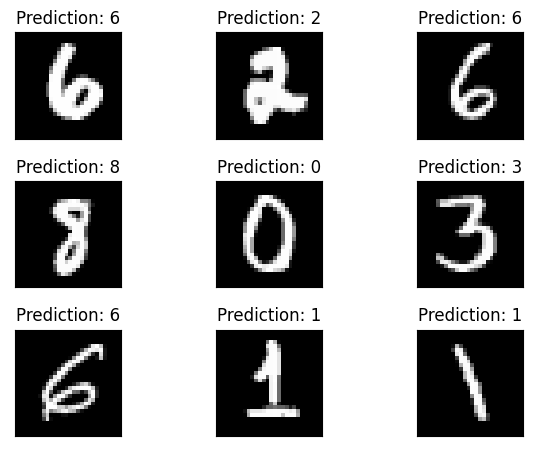

In [12]:
#Plotting results of our prediction and the ground truth together for first 9 examples from test data
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

In [32]:
#Path to the directory containing the hand drawn digits
directory_path = 'D:\OpenCV\Project5_Deep_learning\drawn_numbers'

#Load all images in the directory
images = []
for filename in os.listdir(directory_path):
    if filename.endswith('.jpg'):
        image = cv2.imread(os.path.join(directory_path, filename),cv2.IMREAD_GRAYSCALE)
        ret, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
        images.append(image)

#Convert the images to a tensor
tensor_images = torch.stack([transforms.ToTensor()(image) for image in images])

In [33]:
#Finding predictions for our hand drawn images
with torch.no_grad():
    output = trained_NN(tensor_images)

C:\Users\shree\AppData\Local\Temp\ipykernel_18832\1443040661.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


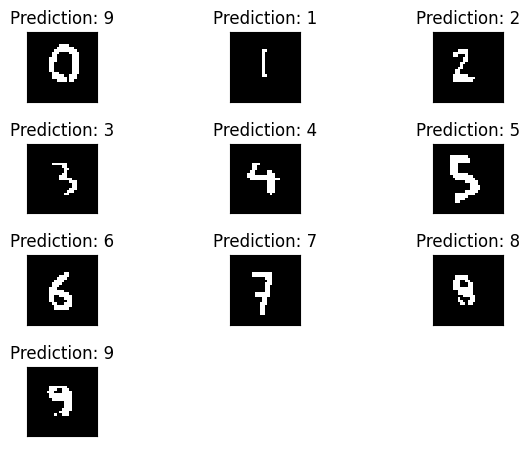

In [34]:
#Plotting results of our prediction and drawn image for 10 digits
fig = plt.figure()
for i in range(10):
    plt.subplot(4,3,i+1)
    plt.tight_layout()
    plt.imshow(tensor_images[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])